 # **Basic Statistics Refresher**

## 1 Mean, Median and Mode

### 1.1 Mean

Mean is just the average value

In [7]:
import numpy as np
incomes = np.random.normal(60000, 15000, 10000)
np.mean(incomes)

59802.107232146824

Above we generate some sample data with a **normal distribution** (about distributions see below). The **median** point is set to 60000 with **standard deviation** (spread of data) of 15000 and size of 10000 (number of elements)

We can segment the income data into 50 buckets and plot it as a histogram

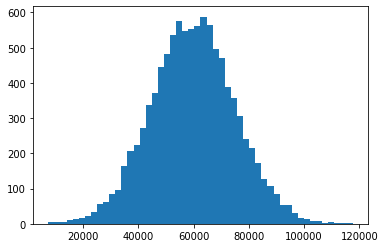

In [9]:
import matplotlib.pyplot as plt

plt.hist(incomes, 50)
plt.show()




## 1.2 Median (middle)

Median is the middle value. If the number of elements in data set is even, we take two middle values and compute their average to get the median. When we analyze the data, we need to look at it's distribution, if it has many outliers the mean can be skewed and looking at median is more useful. 

In [11]:
incomes = np.append(incomes, [1000000000000000])
np.median(incomes)


59814.00783449721

Median didn't change much when we added a giant outlier, but the mean changed a lot. 

In [10]:
np.mean(incomes)

59802.107232146824

## 1.3 Mode

Mode is just the most common value in a data set

In [21]:
ages = np.random.randint(18, high=90, size=50)
ages

array([65, 78, 66, 56, 62, 88, 65, 40, 22, 56, 21, 69, 65, 52, 41, 70, 49,
       35, 85, 65, 27, 77, 32, 63, 78, 35, 28, 37, 26, 86, 58, 31, 39, 74,
       80, 18, 45, 77, 37, 39, 69, 70, 46, 55, 63, 59, 41, 18, 46, 65])

In [22]:
from scipy import stats
stats.mode(ages)

ModeResult(mode=array([65]), count=array([5]))

# 2 Variance and Standard Deviation

## 2.1 Variance

Varience measures how spread out the data is. It's simply the average of the squared differences from the mean.
Example: What is the varience of data set (1,4,5,4,8) ?
    
  * first find the mean: (1+4+5+4+8)/5 = 4.4
  * now find the difference from the mean: (-3.4, -0.4, 0.6, -0.4, 3.6)
  * find the squared differences (11.56, 0.16, 0.36, 0.16, 12.96)
  * find the average of the squared differences 
  * $ Variance = \sigma^2 $
  * $ \sigma^2 = (11.56 + 0.16 + 0.36 + 0.16 + 12.96) / 5 = 5.04 $
  


## 2.2 Standard deviation 

Tipically we talk about standard deviation and not variance. Standard deviation is just the square root of the variance. 

$ \sigma^2 = 5.04 $

$ \sigma = \sqrt 5.04 = 2.24 $

Standard deviation is usually used as a way to identify outliers. Data points that lie more than one standard deviation from the mean, can 
be considered unusual.

You can talk about how extreme a data point is by talking about "how many sigmas" away from the mean it is. 


## 2.3 Population vs Sample

If you are working with a sample of data instead of an entire data set (the entire population), then you need to use the **sample variance** instead of **population varience** 

For N samples, you just divide the squared varience by N-1 instead of N.

So, in our example above, we computed population varience like this:
* $ \sigma^2 = (11.56 + 0.16 + 0.36 + 0.16 + 12.96) / 5 = 5.04 $

But the sample variance would be: 
* $ s^2 = (11.56 + 0.16 + 0.36 + 0.16 + 12.96) / 4 = 6.3 $



## 2.4 Math Notation

* X = data point
* $\mu$ = mean
* Population varience
 * $ \sigma^2 = \frac{\Sigma(X - \mu)^2} {N}$
* Sample variance
 * $ s^2 = \frac{\Sigma(X - \mu)^2} {N-1}$

## 2.5 Example


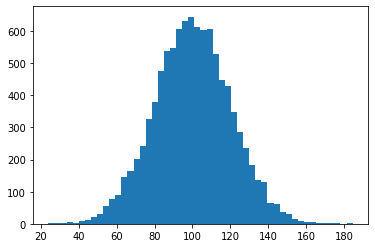

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# median is at 100, standard deviation is 20, 10000 data points
# as we can see if you go left/right from median by 20, graph starts to fall sharply
hourly_rates = np.random.normal(100, 20.0, 10000)

plt.hist(hourly_rates, 50)
plt.show()

In [28]:
# get standard deviation
hourly_rates.std()

20.054071069955373

In [29]:
# get variance
hourly_rates.var()

402.16576647882107

# 3.Probability functions 

## 3.1 Probability density functions

Probabbility of a given range of values occuring in continious data set (infinite) 

### 3.1.1 Normal distibution

![Normal Distribution](https://dietassessmentprimer.cancer.gov/images/learn/distribution2.jpg)

There is a 34.1% chance of range of values occuring between mean and 1 standard deviation to the left and also a 34.1% chance of range of values occuring  between mean and 1 standard deviation to the right. 



## 3.2 Probability mass function

When we are dealing with discrete data we talk about probability mass function and not probability density function.
It measures the probabilty of a discrete value occuring in a data set.




# 4. Examples of data distributions 

## 4.1 Uniform distribution

There is an equal chance of any given value occuring within a specified data range.

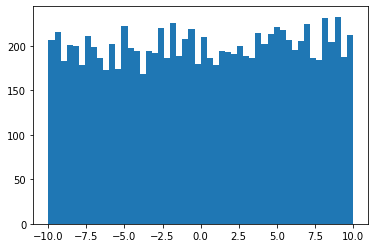

In [37]:
values = np.random.uniform(-10.0, 10.0, 10000)
plt.hist(values, 50)
plt.show()

## 4.2 Normal / Gaussian 

Here we are creatung a list of values from -3 to 3 with the increment of 0.001, those are our x values on the graph. 
On the y axis there is a probability density function (pdf) for a normal distribution on those x values.

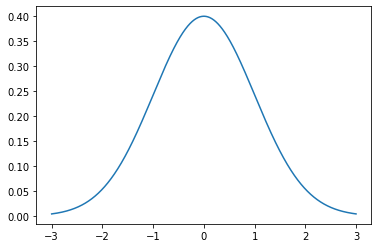

In [40]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))

Generate some random numbers with a normal distribution. "mu" is the desired mean, "sigma" is the standard deviation.

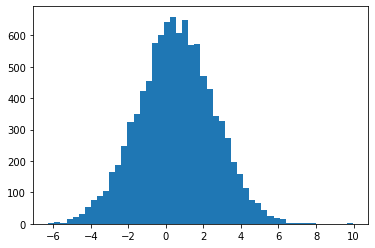

In [41]:
mu = 0.5
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

## 4.3 Exponential proability density function / "Power Law"



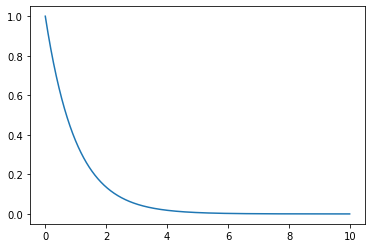

In [56]:
from scipy.stats import expon

x = np.arange(0, 10, 0.01)
#expon.pdf(x) this maps  values from x to (1.0..0), simulates an exponential drop
plt.plot(x, expon.pdf(x))

# 5 Correlation 

Variables within a dataset can be related for lots of reasons.
For example: 
 * One variable could cause or depend on the values of another variable.
 * One variable could be lightly associated with another variable.
 * Two variables could depend on a third unknown variable
 
 It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.
 
 A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.
 
 
* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.




## 5.1 Covariance

Before we can talk about how to compute correlation, we must first talk about covariance. Covariance is a linear relationship between two variables. 

The calculation of the sample covariance between two data points x and y from dataset X and Y is as follows: 

cov(x,y) = $ \frac{\Sigma (x - \mu X) (y - \mu Y)}{n - 1} $

The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.

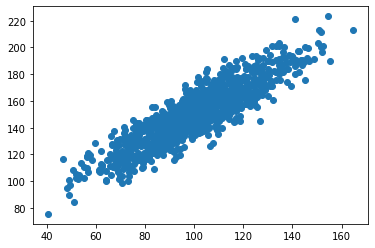

In [65]:
import numpy as np
from matplotlib import pyplot


data1 = np.random.normal(100, 20, 1000) # generate array of 1000 numbers with normal distribution, median of 100 and standard deviation of 20
data2 = data1 + (np.random.randn(1000) * 10 + 50) # generate array of 1000 numbers based on data1 array
pyplot.scatter(data1, data2)
pyplot.show()


In [66]:
np.cov(data1, data2)

array([[410.30153911, 410.33865799],
       [410.33865799, 513.10403972]])

The covariance between two variables is 410.338 We can see that it is positive, suggesting the variables change in the same direction as we expect.

A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.


## 5.2 Pearson's Correlation

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The pearsonr() SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

We can calculate the correlation between the two variables in our test problem.


In [70]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.894


As we can see, it returns a strong positive correlation between two variables in our two data sets. 
The Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

## 5.3 Spearman's Correlation

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

The spearmanr() SciPy function can be used to calculate the Spearman’s correlation coefficient between two data samples with the same length.

In [71]:
from scipy.stats import spearmanr

corr, _ = spearmanr(data1, data2)
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.886


As with the Pearson’s correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for review.